#Análise de Regressão
**Nome:** George Sanders Carvalho Araújo

**URL do dataset:** https://www.kaggle.com/harlfoxem/housesalesprediction

**Problema**
A determinação do preço de imóveis é uma tarefa muito requisitada por imobiliárias e corretores de imóveis. A tarefa muitas vezes é feita por corretores, e sistemas que automatizem essa tarefa podems ser usados como orientação na tomada de decisão.

**Aprendizagem Supervisionada**
Trata-se de um problema de aprendizagem supervisionada pois o dataset possui uma coluna que pode ser usada como y_hat no momento da predição. No caso, a coluna price(preço) será usada como y, para que o modelo de regressão possa tentar estimá-lo.

**Pergunta**
É possível prever o preço de compra com base em outros atributos no dataset?

##Preparação

In [ ]:
#importação do arquivo
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
#Bibliotecas básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("ticks")
%matplotlib inline
#Biblioteca de Regressão Linear Simples
from sklearn.linear_model import LinearRegression
#Bibliotecas de Regressão multivariável
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from numpy.random import seed
#Bibliotecas de Avaliação
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

##Dataset

In [ ]:
# autenticar usuário
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1bpyH0WRMuWRaOTBiqPMI_Mg9A9Rs7-Jp"})
downloaded.GetContentFile('kc_house_data.csv')
df_house = pd.read_csv('kc_house_data.csv')

In [ ]:
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df_house.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
df_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df_house.drop_duplicates(inplace=True)

Serão removidas as colunas **id** e **date** pois estas são irrelevantes para a análise

In [ ]:
df_house = df_house.drop(['id','date'], axis=1)

In [ ]:
df_house.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


##Gráficos

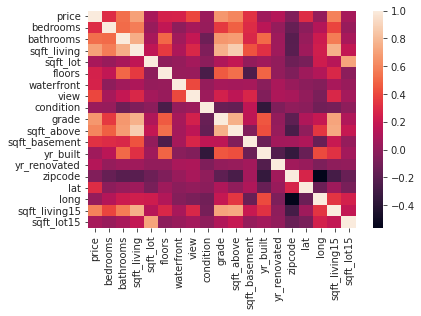

In [ ]:
plot = sb.heatmap(df_house.corr())

##Regressão Multivariável

**Linear Regression**
Como a coluna alvo pode assumir vários valores, e não apenas poucas classes, trata-se também de um problema de regressão.O algoritmo escolhido foi o LinearRegression, pois pode ser utilizado em problemas de regressão tanto no caso univariável, quanto no Multivariável. 

###Separação entre treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_house.drop('price',1), df_house.price, test_size=0.30,random_state=seed())

###Avaliando hiperparâmetros

In [ ]:
param_grid = {
  "fit_intercept": [True, False],
  "normalize": [True, False],
  "n_jobs": [-1,1,2,3]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

lr = LinearRegression()

grid = GridSearchCV(estimator=lr, param_grid = param_grid, cv = 2, n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'n_jobs': [-1, 1, 2, 3], 'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(grid.best_estimator_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)


###Treinamento

In [ ]:
lr_tuned = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [ ]:
lr_tuned.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [ ]:
lr_tuned.coef_

array([-3.239e+04,  3.685e+04,  8.325e+01,  1.737e-01,  7.132e+03,
        5.081e+05,  5.442e+04,  2.596e+04,  9.868e+04,  8.519e+01,
        5.992e+01, -2.480e+03,  2.203e+01, -5.638e+02,  5.955e+05,
       -1.998e+05,  2.353e+01, -4.163e-01])

###Avaliação

In [ ]:
score= lr_tuned.score(X_test,y_test)
print('Score = %.5f' % score)

Score = 0.69772


In [ ]:
r2_score(y_test,lr_tuned.predict(X_test))

0.6977230618051575

In [ ]:
y_pred=lr_tuned.predict(X_test)

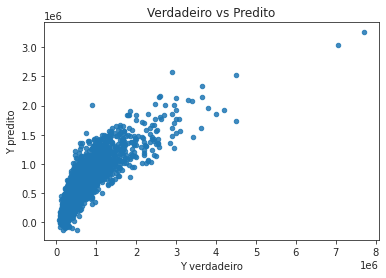

In [ ]:
plt.xlabel('Y verdadeiro')
plt.ylabel('Y predito')
plt.title("Verdadeiro vs Predito")
plt.scatter(y_test,y_pred,alpha=0.85,s=20)

###Testando seleção de atributos

####SelectKBest

Para tentar diminuir o número de dimensões utilizadas no problema, foi a utilizada a biblioteca SelectKBest do SKLearn. Como trata-se de um problema de regressão, é preciso enviar uma função f_regression para o objeto de teste. Caso fosse uma classificação, seria utilizado o f_classif. E no caso de haver atributos categóricos, seria utilizado o chi2.

In [ ]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Alguns K diferentes foram testados, mas o score foi mais baixo do que o esperado
test = SelectKBest(score_func=f_regression, k=12)
fit = test.fit(X_train, y_train)

set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X_train)
print(features[0:5,:])

NameError: ignored

In [ ]:
# Mostrando quais colunas foram selecionadas como as mais importantes
cols = fit.get_support(indices=True)
X_train.iloc[:,cols]

In [ ]:
selected_features = ['bedrooms','bathrooms','sqft_living','floors','waterfront','view','grade','sqft_above','sqft_basement','yr_renovated','lat','sqft_living15']

In [ ]:
X_train_selected_features = X_train[selected_features].copy()
X_train_selected_features

In [ ]:
X_test_selected_features = X_test[selected_features].copy()
X_test_selected_features

In [ ]:
lr_tuned.fit(X_train_selected_features, y_train)

In [ ]:
score = lr_tuned.score(X_test_selected_features,y_test)
print('Score = %.5f' % score)

####FeatureImportance

Esta ferramenta retorna as features mais significativas para o resultado e podem ser usadas para reduzir as dimensões

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Criando um DataFrame com as colunas e seus scores:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

In [ ]:
# Visualizando as importâncias de forma gráfica:
feature_importances.plot(kind='bar')

##Conclusão

**Problema resolvido?**
É possível, com os atributos utilizados, estimar qual o preço de um imóvel. Porém, com 70% de score, que foi o valor máximo obtido, é possível que a avaliação não seja tão confiável.
**É possível melhorar?**
Este foi o maior score possível com as tarefas utilizadas. Talvez algumas etapas a mais de pré-processamento possam ser aplicadas para aumentar a pontuação, como normalização e eliminação de outliers.